In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from numpy import random

# ===== example ============
#mu, sigma = 12, 3.0 # mean and standard deviation
#s = np.random.normal(mu, sigma, 1000)

#count, bins, ignored = plt.hist(s, 100, density=True)
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
#               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
#         linewidth=2, color='r')
#plt.show()
#A = ['pooh', 'rabbit', 'piglet', 'Christopher']
#print(np.random.choice(A, 5, p=[0.5, 0.1, 0.1, 0.3]))
# ==========================
class MarkovChain:
    def __init__(self):
        
        self.state = {
                        0 : "Cleary",
                        1 : "Cloudy",
                        2 : "Rainy"
                     }
        self.A = np.array( [
                [0.50, 0.30, 0.20], 
                [0.10, 0.45, 0.45], 
                [0.45, 0.10, 0.45]
                        ] )
    def Random_Walk(self):
        n = 15
        start_state = 0
        curr_state = start_state
        print(state[curr_state], "--->", end=" ")
        while n-1:
            curr_state = np.random.choice([0, 1, 2], p=A[curr_state])
            print(state[curr_state], "--->", end=" ")
            n-=1
        print("stop")
    def Monte_Carlo(self):
        # Approach -1 : Monte Carlo 
        steps = 10**6
        start_state = 0
        curr_state = start_state
        pi = np.array([0, 0, 0])
        pi[start_state] = 1
        i = 0
        while i<steps:
            curr_state = np.random.choice([0,1,2], p=A[curr_state])
            pi[curr_state]+=1
            i +=1
        print("π = ", pi/steps)
        return pi/steps
    def Matrix_Multiplication(self):
        # Approach - 2 :  Repeated Matrix Multiplication
        steps = 10**3
        A_n = A
        i=0
        while i<steps:
            A_n =  np.matmul(A_n, A)
            i+=1

        print("A^n = \n", A_n, "\n")
        print("π = ", A_n[0])
        return A_n[0]
    def Eigen_Vectors(self):
        # Approach - 3 : Finding Left Eigen Vectors
        values, left = scipy.linalg.eig(A, right = False, left = True)
        # print("left eigen vectors = \n", left, "\n")
        # print("eigen values = \n", values)
        pi = left[:,0]
        pi_normalized = [(x/np.sum(pi)).real for x in pi]
        return pi_normalized

    def find_prob(self,seq, A, pi):
        start_state = seq[0]
        prob = pi[start_state]
        prev_state, curr_state = start_state, start_state
        for i in range(1, len(seq)):
            curr_state = seq[i]
            prob *= A[prev_state][curr_state]
            prev_state = curr_state
        return prob
    

    
#np.random.seed(0)
#n_frmr, n_day, sigma_day = 10, 30, 5
n_frmr, n_day, sigma_day = 20, 30, 5
# frmr = random.exponential(scale=n_day/2, size=(n_frmr, 30))
frmr = np.random.normal(n_day/2, sigma_day, n_frmr)
#count, bins, ignored = plt.hist(frmr, 100, density=True)
#plt.show()
#v_frmr, v_sigma = 12, 3.0 # mean and standard deviation
v_frmr, v_sigma = 15, 3.0 # mean and standard deviation
vl_frmr = np.random.normal(v_frmr, v_sigma, n_frmr)
#count, bins, ignored = plt.hist(vl_frmr, 100, density=True)
#plt.show()

m_frmr, m_sigma = 25, 2.0 # mean and standard deviation
mi_frmr = np.random.normal(m_frmr, m_sigma, n_frmr)

frmr_day_vl = [[0.0 for col in range(n_day)] for row in range(n_frmr)]
frmr_day_mi = [[0.0 for col in range(n_day)] for row in range(n_frmr)]

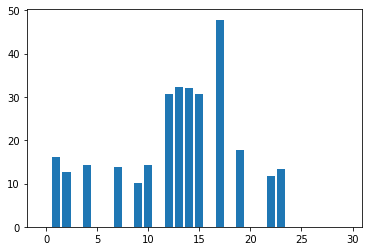

In [7]:
#assign rice volume for each farmer in day of month
for row in range(n_frmr):
    frmr_day_vl[row][int(frmr[row])] = round(vl_frmr[row],2)
    frmr_day_mi[row][int(frmr[row])] = round(mi_frmr[row],2)

#print(frmr_day_mi)
#print(frmr_day_vl)
arr_frmr_day_vl = np.array(frmr_day_vl)
sum_alldays = arr_frmr_day_vl.sum(axis=0)

#print(np.arange(sum_alldays.size))
plt.bar(np.arange(sum_alldays.size), sum_alldays)
plt.show()
#plt.xticks(np.range(sum_alldays), np.range(sum_alldays))

In [3]:
A = np.array( [  # Clary cloudy rainy
                [0.50, 0.30, 0.20], 
                [0.10, 0.45, 0.45], 
                [0.45, 0.10, 0.45]
                        ] )
B = np.array( [   # Sun ligth prob 
                [0.80, 0.20], 
                [0.50, 0.50], 
                [0.05, 0.95]
                        ] )
m  = MarkovChain()
pi_normalized = m.Eigen_Vectors()
#print(pi_normalized)
prob = m.find_prob([1, 2, 2, 0], A, pi_normalized)
#print(prob)
#print(m.find_prob([1, 2, 2, 0], A, pi_normalized))

In [4]:
class ForwardAlgorithm:
    def __init__(self):
        self.prob = 0.0
    def DynamicProgram(self, prbA, MkA, ObA, PiA, demands):
        for t in range(len(demands)):
            for i in range(len(MkA)):
                if t == 0 :
                    #print("PiA : " + str(PiA[i]) + " , ObA[i,demands[j]] : " + str(ObA[i,demands[j]]))
                    prbA[i,t] =  PiA[i] * ObA[i,demands[t]] 
                else:
                    sumi = 0.0
                    for j in range(len(MkA)):
                        #print("prbA[j,t-1] : " + str(prbA[j,t-1]) + " , MkA[j,i] : " + str(MkA[j,i]) + " , ObA[i,demands[j] : " + str(ObA[i,demands[t]]) )
                        sumi +=    prbA[j,t-1] *  MkA[j,i] *   ObA[i,demands[t]]  
                    prbA[i,t] = sumi
        return prbA  #prb.sum(axis=0)

In [5]:
#A = np.array( [  # Clary cloudy rainy
#                [0.50, 0.50], 
#                [0.30, 0.70] 
#                        ] )
#B = np.array( [   # Sun ligth prob 
#                [0.80, 0.20], 
#                [0.40, 0.60]
#                        ] )
#pi_normalized = np.array( [0.375, 0.625])
demands = np.array([0, 0])
N = len(demands) # N days to sunlight
FA  = ForwardAlgorithm()
dm = (len(A), len(demands))  # create a dimentional array
HMC = FA.DynamicProgram(np.zeros(dm),A,B,pi_normalized,demands)
prob = HMC.sum(axis=0)[len(demands)-1]

In [6]:
mCap = 14  # ton per day
lCap = 20 # ton per day
nCap = 20  # day
mPrc  = 100 # Cost  machine per ton
nPrc  = 50 # Cost neutral per ton
orgwk = arr_frmr_day_vl.sum(axis=0)
sum_alldays = arr_frmr_day_vl.sum(axis=0)
#np.random.seed(0)
#print(sum_alldays)
for day in range(len(sum_alldays)):
    print("Day " + str(day)  + " \t Org Wl " + str(round(orgwk[day],2)) + " \t WL " +  str(round(sum_alldays[day],2)),  end=" ")
    if (sum_alldays[day] > mCap):
        print("\n\t>>HMM Process : " , end=" ")
        WeatherDay = np.random.choice([0,1], p=[0.65,0.35])
        OvCap = sum_alldays[day] - mCap
        print("Over Cap " + str(round(OvCap,2)) , end=" ")
        # ---- HMC ---------
        nDay_light = np.concatenate( ([WeatherDay],np.zeros(int(OvCap/nCap)+1, int)))
        dm = (len(A), len(nDay_light))
        HMC = FA.DynamicProgram(np.zeros(dm),A,B,pi_normalized,nDay_light)
        prob = HMC.sum(axis=0)[len(nDay_light)-1]
        print("Prob of sun ligth : " + str(round(prob*100,2)) + "%", end=" ")
        # ---- HMC --------
        nxDay = 0
        while OvCap > 0 :
            nxDay += 1
            #print("")
            #print(OvCap , sum_alldays[day+nxDay] , day+nxDay)
            if (sum_alldays[day+nxDay] + OvCap) > mCap :
                OvCap = sum_alldays[day+nxDay] + OvCap - mCap
                sum_alldays[day+nxDay] = mCap
            else:
                sum_alldays[day+nxDay] += OvCap
                OvCap = 0
        print("")
    else:
        print("\t Cost  " + str(round(mPrc*sum_alldays[day],2)))


Day 0 	 Org Wl 0.0 	 WL 0.0 	 Cost  0.0
Day 1 	 Org Wl 16.19 	 WL 16.19 
	>>HMM Process :  Over Cap 2.19 Prob of sun ligth : 21.96% 
Day 2 	 Org Wl 12.65 	 WL 14.0 	 Cost  1400.0
Day 3 	 Org Wl 0.0 	 WL 0.84 	 Cost  84.0
Day 4 	 Org Wl 14.22 	 WL 14.22 
	>>HMM Process :  Over Cap 0.22 Prob of sun ligth : 23.24% 
Day 5 	 Org Wl 0.0 	 WL 0.22 	 Cost  22.0
Day 6 	 Org Wl 0.0 	 WL 0.0 	 Cost  0.0
Day 7 	 Org Wl 13.82 	 WL 13.82 	 Cost  1382.0
Day 8 	 Org Wl 0.0 	 WL 0.0 	 Cost  0.0
Day 9 	 Org Wl 10.06 	 WL 10.06 	 Cost  1006.0
Day 10 	 Org Wl 14.38 	 WL 14.38 
	>>HMM Process :  Over Cap 0.38 Prob of sun ligth : 21.96% 
Day 11 	 Org Wl 0.0 	 WL 0.38 	 Cost  38.0
Day 12 	 Org Wl 30.69 	 WL 30.69 
	>>HMM Process :  Over Cap 16.69 Prob of sun ligth : 23.24% 
Day 13 	 Org Wl 32.23 	 WL 14.0 	 Cost  1400.0
Day 14 	 Org Wl 32.1 	 WL 14.0 	 Cost  1400.0
Day 15 	 Org Wl 30.69 	 WL 14.0 	 Cost  1400.0
Day 16 	 Org Wl 0.0 	 WL 14.0 	 Cost  1400.0
Day 17 	 Org Wl 47.86 	 WL 14.0 	 Cost  1400.0
Day 18